# Matlab으로 데이터 시각화하기

**데이터를 보기좋게 표현해봅시다.**

#### 1. Matplotlib 시작하기
   
#### 2. 자주 사용되는 Plotting의 Options
- 크기 : `figsize`
- 제목 : `title`
- 라벨 : `_label`
- 눈금 : `_ticks`
- 범례 : `legend`
  
#### 3. Matplotlib Case Study
- 꺾은선 그래프 (Plot)
- 산점도 (Scatter Plot)
- 박스그림 (Box Plot)
- 막대그래프 (Bar Chart)
- 원형그래프 (Pie Chart)
  
#### 4. The 멋진 그래프, seaborn Case Study
- 커널밀도그림 (Kernel Density Plot)
- 카운트그림 (Count Plot)
- 캣그림 (Cat Plot)
- 스트립그림 (Strip Plot)
- 히트맵 (Heatmap)
  

## I. Matplotlib 시작하기

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

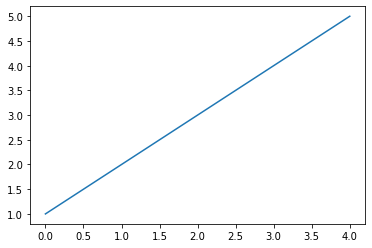

In [5]:
plt.plot([1,2,3,4,5])
plt.show()

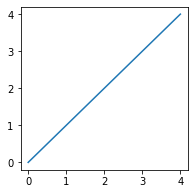

In [6]:
plt.figure(figsize=(3,3))
plt.plot([0,1,2,3,4])
plt.show()

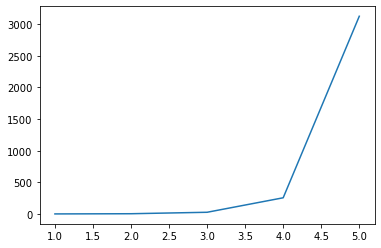

In [7]:
x = np.array([1,2,3,4,5])
y = np.array([i**i for i in range(1,6)])
plt.plot(x,y)
plt.show()

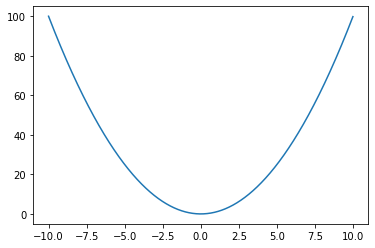

In [8]:
x = np.arange(-10, 10, 0.01)
x[:5]
plt.plot(x, x**2)
plt.show()

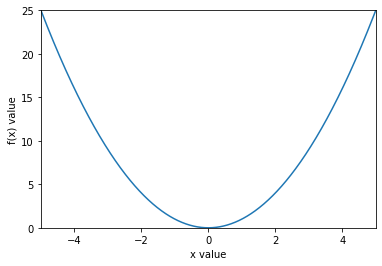

In [9]:
# x, y축에 설명 추가하기
x = np.arange(-10, 10, 0.01)

plt.xlabel('x value')
plt.ylabel('f(x) value')

plt.axis([-5, 5, 0, 25]) #[x_min, x_max, y_min, y_max]

plt.plot(x, x**2)
plt.show()

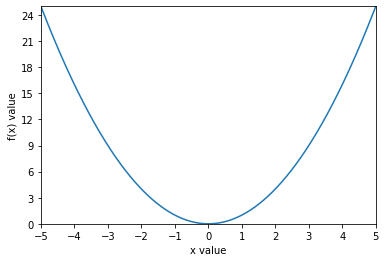

In [10]:
# x, y축에 눈금 설정하기
x = np.arange(-10, 10, 0.01)

plt.xlabel('x value')
plt.ylabel('f(x) value')
plt.axis([-5, 5, 0, 25]) #[x_min, x_max, y_min, y_max]
plt.xticks([i for i in range(-5, 6, 1)]) # y축의 눈금 설정
plt.yticks([i for i in range(0, 27, 3)]) # x축의 눈금 설정

plt.plot(x, x**2)
plt.show()

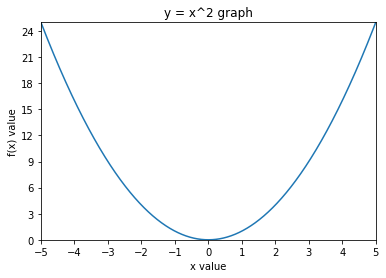

In [11]:
# 그래프에 title 달기
x = np.arange(-10, 10, 0.01)

plt.xlabel('x value')
plt.ylabel('f(x) value')
plt.axis([-5, 5, 0, 25]) #[x_min, x_max, y_min, y_max]
plt.xticks([i for i in range(-5, 6, 1)]) # y축의 눈금 설정
plt.yticks([i for i in range(0, 27, 3)]) # x축의 눈금 설정

###
plt.title('y = x^2 graph')
###

plt.plot(x, x**2)
plt.show()

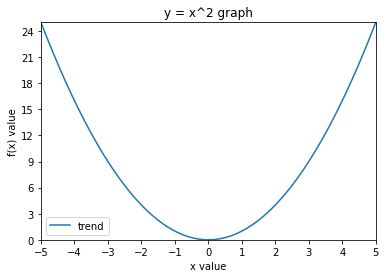

In [12]:
# 그래프에 title 달기
x = np.arange(-10, 10, 0.01)

plt.xlabel('x value')
plt.ylabel('f(x) value')
plt.axis([-5, 5, 0, 25]) #[x_min, x_max, y_min, y_max]
plt.xticks([i for i in range(-5, 6, 1)]) # y축의 눈금 설정
plt.yticks([i for i in range(0, 27, 3)]) # x축의 눈금 설정

plt.title('y = x^2 graph')
plt.plot(x, x**2, label='trend')
plt.legend()
plt.show()

## II. Matplotlib Case Study

## III. Matplotlib Case Study

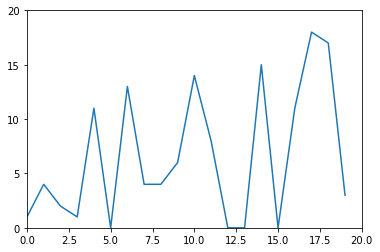

In [13]:
x = np.arange(20)
y = np.random.randint(0, 20, 20)
plt.plot(x, y)

plt.axis([0, 20, 0, 20])
plt.yticks([0, 5, 10, 15, 20])
plt.show()
# y축을 20까지 보이게, y축을 5단위로 보이게
#.axis(), .yticks()

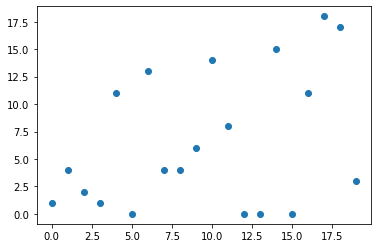

In [14]:
plt.scatter(x,y)
plt.show()

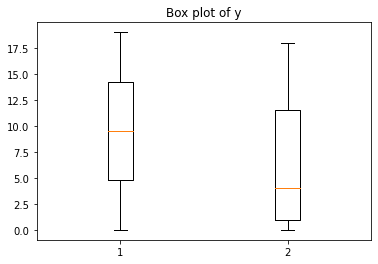

In [15]:
plt.boxplot((x,y))
plt.title('Box plot of y')
plt.show()

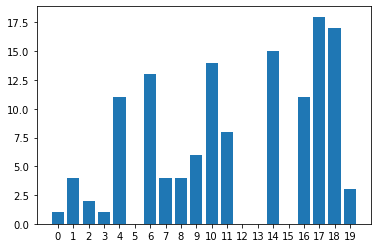

In [16]:
plt.bar(x,y)
plt.xticks(np.arange(0, 20, 1))
plt.show()

# xticks를 올바르게

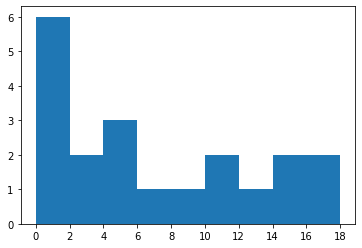

In [17]:
# cf. histogram
# .hist()
# 도수분포를 직사각형의 막대 형태
# 계급으로 나타낸 것이 특징 0, 1, 2가 아니라 0~2까지의 범주형 데이터로 구성 후 그림을 그림
plt.hist(y, bins=np.arange(0, 20, 2))
plt.xticks(np.arange(0, 20, 2))
plt.show()

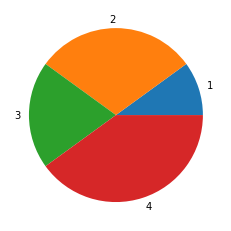

In [18]:
z = [100, 300, 200, 400]
plt.pie(z, labels=['1','2','3','4'])
plt.show()

## IV. The 멋진 그래프, Seaborn Case Study

In [20]:
import seaborn as sns

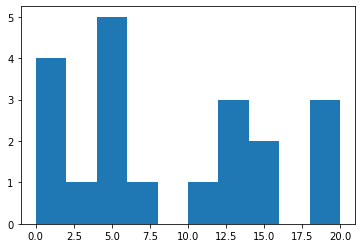

In [21]:
# in Histogram
x = np.arange(0, 22, 2)
y = np.random.randint(0, 20, 20)
plt.hist(y, bins=x)
plt.show()

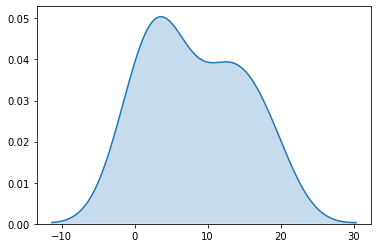

In [22]:
# kdeplot

sns.kdeplot(y, shade=True)
plt.show()

In [23]:
vote_df = pd.DataFrame({'name':['Andy', 'Bob', 'Cat'], 'vote':[True, True, False]})
vote_df

,name,vote
0,Andy,True
1,Bob,True
2,Cat,False


In [24]:
# in matplotlib barplot
vote_count = vote_df.groupby('vote').count()
vote_count

,name
vote,
False,1
True,2


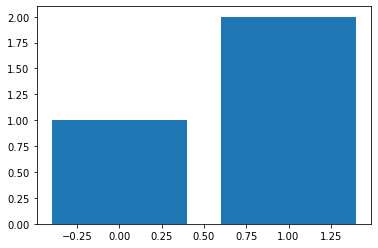

In [25]:
plt.bar(x=[False, True], height=vote_count['name'])
plt.show()

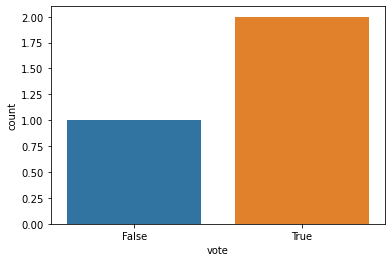

In [26]:
# sns의 countplot
sns.countplot(x=vote_df['vote'])
plt.show()

In [27]:
covid = pd.read_csv('country_wise_latest.csv')
covid.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


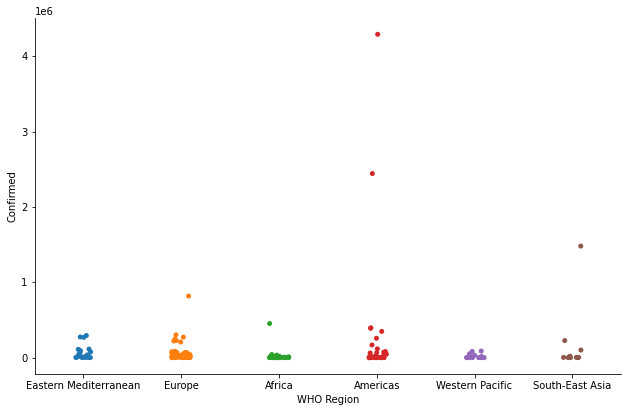

In [28]:
s = sns.catplot(x='WHO Region', y='Confirmed', data=covid,)
s.fig.set_size_inches(10,6)
plt.show()

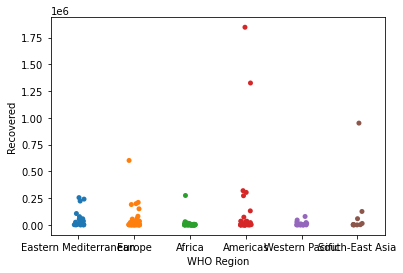

In [29]:
s = sns.stripplot(x='WHO Region', y='Recovered', data=covid)
plt.show()

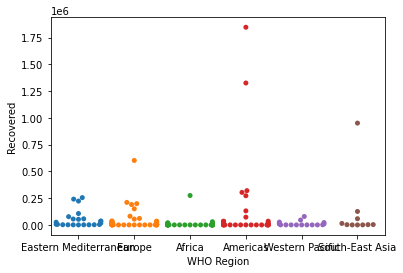

In [30]:
# cf. swarplot
s = sns.swarmplot(x='WHO Region', y='Recovered', data=covid)
plt.show()

In [31]:
covid.corr()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
Confirmed,1.000000,0.934698,0.906377,0.927018,0.909720,0.871683,0.859252,0.063550,-0.064815,0.025175,0.999127,0.954710,-0.010161
Deaths,0.934698,1.000000,0.832098,0.871586,0.806975,0.814161,0.765114,0.251565,-0.114529,0.169006,0.939082,0.855330,-0.034708
Recovered,0.906377,0.832098,1.000000,0.682103,0.818942,0.820338,0.919203,0.048438,0.026610,-0.027277,0.899312,0.910013,-0.013697
Active,0.927018,0.871586,0.682103,1.000000,0.851190,0.781123,0.673887,0.054380,-0.132618,0.058386,0.931459,0.847642,-0.003752
New cases,0.909720,0.806975,0.818942,0.851190,1.000000,0.935947,0.914765,0.020104,-0.078666,-0.011637,0.896084,0.959993,0.030791
New deaths,0.871683,0.814161,0.820338,0.781123,0.935947,1.000000,0.889234,0.060399,-0.062792,-0.020750,0.862118,0.894915,0.025293
New recovered,0.859252,0.765114,0.919203,0.673887,0.914765,0.889234,1.000000,0.017090,-0.024293,-0.023340,0.839692,0.954321,0.032662
Deaths / 100 Cases,0.063550,0.251565,0.048438,0.054380,0.020104,0.060399,0.017090,1.000000,-0.168920,0.334594,0.069894,0.015095,-0.134534
Recovered / 100 Cases,-0.064815,-0.114529,0.026610,-0.132618,-0.078666,-0.062792,-0.024293,-0.168920,1.000000,-0.295381,-0.064600,-0.063013,-0.394254
Deaths / 100 Recovered,0.025175,0.169006,-0.027277,0.058386,-0.011637,-0.020750,-0.023340,0.334594,-0.295381,1.000000,0.030460,-0.013763,-0.049083


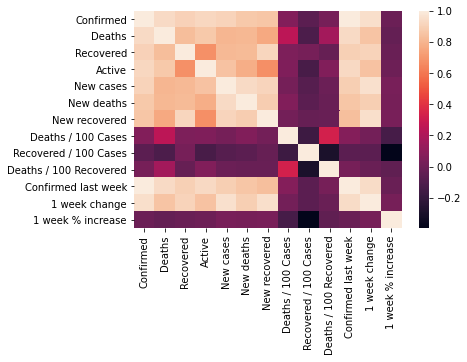

In [32]:
sns.heatmap(covid.corr())
plt.show()

## Mission:

asddddddddddd
